# Spotify 

## About the Data

### Our Spotify dataset

The data that we will use for this project was extracted from Spotify through its dedicated [Web API](https://developer.spotify.com). However we used [Spotipy](https://spotipy.readthedocs.io/en/master/), which is a Python library, to interact with the API directly. 

Two datasets were initially extracted from the data collection process (*detailed below*). But these datasets were merged to form a single dataset that contains both the basic information of individual songs/tracks and their respective audio features. 

Essentially, the Spotify dataset is, more or less, a compilation of songs with their attached quantitative features describing the audio qualities of each song.

Below is a table summarizing the features that can be found in the dataset with its equivalent descriptions:

| column | type | dtype | description* |
|--------|-------|----|----------|
| song title | nominal | str | The track's title. |
| artist name | nominal | str | The name of artist of the specific track. |
| release date | ordinal | datetime | The date the album was first released. |
| duration | **continuous** | int | The track length in milliseconds. |
| popularity | **continuous** | int | The popularity of the artist. The value will be between 0 and 100, with 100 being the most popular. The artist's popularity is calculated from the popularity of all the artist's tracks. |
| uri | nominal | str | The Spotify URI for the track. Foreign key of the dataset |
| danceability | **continuous** | float | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. |
| energy | **continuous** | float | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. |
| key | ordinal | int | The key the track is in. Integers map to pitches using standard Pitch Class notation. |
| loudness | **continuous** | float | The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db. |
| mode | nominal | int | Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. |
| speechiness | **continuous** | float | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. |
| acousticness | **continuous** | float | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. |
| instrumentalness | **continuous** | float | Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. |
| liveness | **continuous** | float | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. |
| valence | **continuous** | float | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). |
| tempo | **continuous** | float | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. |
| time signature | ordinal | int | An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). |

*Descriptions of each feature is taken from the Spotify Web API [documentation](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features)** 

### Data collection with the Spotify Web API & Spotipy Python package 
- Provide the description of the collection process executed to build the dataset. Discuss any implications of the data collection method.

Our approach to collecting data from Spotify was a two-fold process that began with extracting tracks from a list of playlist and afterwards retrieving the audio features of these tracks.

To get a better grasp of our data collection process, you can check out our [GitHub repo](https://github.com/dapniii/DATA102-Spotify-Recommendation-System) where we have uploaded the two Python scripts (*track_extractor.py & audio_feature_extractor.py*) that we have used to implement this. 

#### Extracting tracks from playlists
Initially, we have opted to only collect tracks from the two longest playlists available on Spotify: [The Longest Playlist on Spotify](https://open.spotify.com/playlist/5S8SJdl1BDc0ugpkEvFsIL) & [The Longest Playlist Ever](https://open.spotify.com/playlist/6yPiKpy7evrwvZodByKvM9). However, we found the number of entries extracted to be insufficient—only yielding around 20k entries. And this number does not even account for any duplicated values yet.

So, to increase number of tracks, we have decided to instead collect playlists from official Spotify accounts (*e.g., SpotifyPH, Spotify Asia, Spotify US, etc.*). 

This strategy proves to be quite effective since we were able to collect a significant number of playlists, which translates to over 160k tracks that were extracted in total. 

The tracks and its features are then placed in its own dictionary entry and then appended in a list/array. This list is then written into a JSON file to be accessed later to either retrieve the tracks' audio features or to process it. 

#### Retrieving audio features per track
Using the JSON file storing the tracks data, we retrieved the audio features by first listing down the unique URIs of each track. 

The URI is an essential feature of the datasets that we've churned out since it allows us to (1) effectively identify duplicated values, (2) call data specific to that URI, and (3) merge datasets since it acts as foreign 
key for the datasets.

Each retrieved audio features data entry is also placed in its own dictionary entry that is also added into a list. The list is then written into a JSON file as well.

#### Room for improvement
Our process remains inelegant since we have mostly relied on manually encoded inputs to extract data. It is perhaps better to have implemented a system that allows us to access playlists or even tracks directly from users. This way we would be able to actually get data from actual users AND automate the process further.

## Data Preprocessing and Diagnostics

### Importing necessary packages and library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

from scipy.stats import kstest
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline 

### Reading in the datasets as JSON

In [2]:
#  reading in the tracks.json to a pandas DataFrame
tracks_df = pd.read_json("data\\tracks.json")

#  reading in the audio_features.json to a pandas DataFrame
audio_features_df = pd.read_json("data\\audio_features.json")

In [3]:
#  display random data entries
tracks_rows, tracks_cols = tracks_df.shape

display(tracks_df.sample(10))
print(f"Total entries: {tracks_rows}")

,song_title,artist_name,album_title,release_date,duration,popularity,uri
85887,Animalistic,Kida Kudz,Animalistic,2021-04-09,166812,30,spotify:track:7Hvn6MDsWBj3aOVvJRu9Np
39581,Velvet / Jenny Francis - Interlude,Stormzy,Gang Signs & Prayer,2017-02-24,339933,47,spotify:track:4GXMWFus2XoMuPqP5gdgld
59723,Shake It Up,Selena Gomez,Shake It Up,2011-01-01,180346,30,spotify:track:5MfRd2sGeqjNXwV9jOeUzp
12467,I Think Ur A Contra,Vampire Weekend,Contra,2010-01-11,269160,0,spotify:track:3BLxSMHBC4DcMsTGFwjUH0
123476,Le temps passe,Matilda Charpie,Le temps passe,2020-03-27,158250,48,spotify:track:1FKTWT91DCPwRbWMxK3NZn
111436,Slam the Door,Zedd,Slam the Door,2012,281538,0,spotify:track:7zNF2ALYpFspy059PEiLRv
108641,Sugar (feat. Francesco Yates),Robin Schulz,Sugar,2015-09-25,219043,77,spotify:track:5tf1VVWniHgryyumXyJM7w
5366,Shine,Benjamin Francis Leftwich,Last Smoke Before the Snowstorm,2011-07-03,182613,0,spotify:track:4hIv0vg8xbxlbbde8cIkcz
84744,Alpha Focus 97Hz - 104Hz,Universal Frequency,Alpha Focus,2021-03-28,231068,60,spotify:track:67VwwXXg1k6cEMFX1rpGoo
127220,Brother the Cloud,Eddie Vedder,Brother the Cloud,2022-01-14,262226,39,spotify:track:5anYF2hAddGXTmeHufKsHN


Total entries: 161056


In [4]:
#  display random data entries
af_rows, af_cols = audio_features_df.shape

display(audio_features_df.sample(10))
print(f"Total entries: {af_rows}")

,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
106744,spotify:track:10V8XpuyMoEcSMfM79WDET,0.518,0.948,6,-5.580,0,0.0683,0.00504,0.104000,0.2280,0.5500,103.025,4
108833,spotify:track:7wwIH9so3zDjFpsv48XEwL,0.591,0.950,0,-5.361,1,0.0673,0.00310,0.000009,0.2060,0.7440,95.082,4
59047,spotify:track:5tXyNhNcsnn7HbcABntOSf,0.666,0.878,7,-2.850,0,0.0973,0.03000,0.000000,0.0828,0.6690,119.932,4
82767,spotify:track:2iqA5Na5vlo0bnZUf8KT1N,0.707,0.931,2,-5.463,1,0.0545,0.09330,0.002670,0.1530,0.7020,136.822,4
41754,spotify:track:7ykYzVrLJzL3TgWvLGHrnD,0.590,0.520,4,-8.487,0,0.0305,0.46600,0.000323,0.3600,0.5270,121.047,4
112964,spotify:track:4GV5wmFd0G5NW8lQK9aVvP,0.474,0.118,4,-22.932,1,0.0296,0.84400,0.009460,0.1130,0.6580,98.095,4
51897,spotify:track:3qV8W6cytQG53azQ5FnSE4,0.340,0.598,9,-8.161,1,0.0279,0.00514,0.482000,0.1720,0.1570,113.018,4
115780,spotify:track:4e32dfjeeThNf4oA2d9PCs,0.182,0.469,9,-9.014,0,0.0379,0.56900,0.000000,0.1460,0.3320,50.573,4
117580,spotify:track:72yP0DUlWPyH8P7IoxskwN,0.667,0.750,0,-4.602,1,0.0906,0.07460,0.000198,0.1970,0.4860,126.041,4
16824,spotify:track:5pXwxVKaFeXzJLSehUJ1nG,0.269,0.255,6,-14.918,1,0.0352,0.75500,0.000376,0.1730,0.0992,96.110,4


Total entries: 160513


Although both datasets have been collected from the same source, there is an apparent discrepancy in the total number of entries that were extracted for both datasets. 

There are 543 entries that are missing from the audio features dataset. This could mean that certain songs do not have any of their audio features ready for extraction. 

### Merging the datasets

In [5]:
#  joining the two datasets with SQL inner join-like mechanism 
spotify_df = tracks_df.join(audio_features_df, how="inner",rsuffix="_duplicate")

#  dropping the duplicated key column 
spotify_df = spotify_df.drop(columns="uri_duplicate")

display(spotify_df.sample(5))
print(f"Current total entries: {spotify_df.shape[0]} from {tracks_df.shape[0]} (tracks)")
print(f"Total features: {spotify_df.shape[1]}")

,song_title,artist_name,album_title,release_date,duration,popularity,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
102262,Light Heart,Carmelito,Light Heart,2021-06-14,119554,57,spotify:track:1PVN8pKYgISfY2sA58ahFG,0.703,0.700,5,-6.789,1,0.0693,0.302,0.471,0.0718,0.582,97.675,4
79523,Electric Feel,MGMT,Oracular Spectacular,2007-12-14,229640,77,spotify:track:3FtYbEfBqAlGO46NUDQSAt,0.574,0.341,1,-12.398,1,0.0349,0.385,0.640,0.0874,0.222,80.919,4
21177,Can't Believe It (feat. 2 Chainz),Kid Cudi,Entergalactic,2022-09-30,172106,70,spotify:track:1r3qUIDhMvoTct7cxPnbdN,0.733,0.625,6,-5.319,1,0.1760,0.166,0.000,0.1180,0.255,132.248,4
52276,My Silver Lining - Spotify Sessions,First Aid Kit,Spotify Sessions,2014-11-10,215426,35,spotify:track:3iZy5gaYIgp6wle6flgTWL,0.432,0.622,4,-4.007,1,0.0304,0.383,0.000,0.1390,0.304,75.193,4
32401,Boom Boom (feat. CHRSTPHR),Matt Sassari,Boom Boom (feat. CHRSTPHR),2022-09-02,178131,52,spotify:track:41Fq0oWTtuGes9RR6UhMw1,0.680,0.927,4,-6.270,0,0.0405,0.107,0.936,0.2070,0.117,125.009,4


Current total entries: 160513 from 161056 (tracks)
Total features: 19


We merged the two datasets with an INNER join. This, of course, reduced the total number of entries for the Spotify dataset. Since an inner join only joins entries with matching values, the Spotify dataset we created only assumed the number of entries of the dataset with the least number of entries: the audio features dataset. 

That is why we are left with **160513** entries with only **19** features. So, from the get go, 543 entries have already been removed from the dataset. 

### Validating data types

In [6]:
#  check dtypes of each column
spotify_df.dtypes

song_title           object
artist_name          object
album_title          object
release_date         object
duration              int64
popularity            int64
uri                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object

Majority of the columns contain the expected data type that is appropriate to the values that specific feature holds. 

The only exception to this is the *release_date* column.

Hence, we need to **convert the release_date column's dtype to datetime from object/string**.  

### Checking missing/null values

<AxesSubplot:>

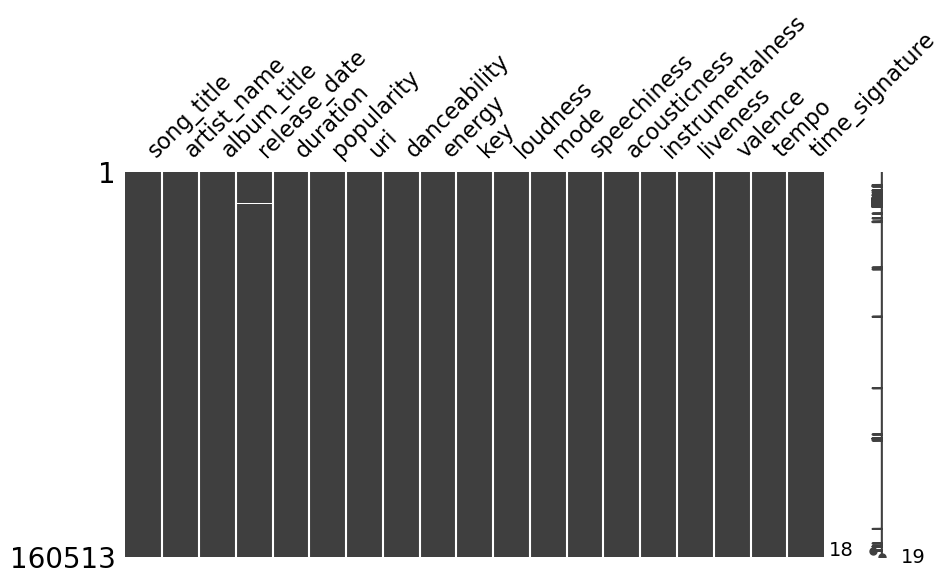

In [7]:
#  check if there are any null values
msno.matrix(spotify_df, figsize=(10,5))

Once again, we see that most of the features have no missing values.

The exception to this observation, of course, is the *release_date* column. We shall examine this column further.

In [8]:
#  display rows with missing release_date
missing_rows = spotify_df["release_date"].isnull()
spotify_df[missing_rows]

,song_title,artist_name,album_title,release_date,duration,popularity,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
5443,In the Shadow of the Valley,,,None,187000,0,spotify:local:::In+the+Shadow+of+the+Valley:187,0.718,0.665,8,-10.369,1,0.1010,0.917000,0.000675,0.1100,0.751,79.725,4
5844,April Sweatpants,,,None,166000,0,spotify:local:::April+Sweatpants:166,0.563,0.663,1,-7.800,0,0.0337,0.043000,0.000000,0.1210,0.703,200.015,4
6002,Gee (Korean Ver. MP3 only),SNSD,,None,205000,0,spotify:local:SNSD::Gee+%28Korean+Ver.+MP3+onl...,0.467,0.495,2,-15.455,0,0.0516,0.161000,0.017100,0.0714,0.448,146.016,4
6003,Hero,,,None,194000,0,spotify:local:::Hero:194,0.576,0.579,6,-9.628,1,0.0769,0.160000,0.000000,0.0777,0.947,106.978,4
6008,Beneath the Mask [With Lyrics] - Persona 5,,,None,285000,0,spotify:local:::Beneath+the+Mask+%5BWith+Lyric...,0.663,0.735,8,-5.933,1,0.0275,0.000194,0.025500,0.0954,0.418,114.018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156239,Turning Japanese,The Vapors,The 80's Pop Culture Box - Disc 1,None,224000,0,spotify:local:The+Vapors:The+80%27s+Pop+Cultur...,0.524,0.559,5,-8.319,1,0.0298,0.185000,0.000059,0.1400,0.202,140.043,4
156240,Walk Like An Egyptian,Bangles,The 80's Pop Culture Box - Disc 7,None,204000,0,spotify:local:Bangles:The+80%27s+Pop+Culture+B...,0.716,0.828,11,-13.065,1,0.1040,0.011700,0.000002,0.3010,0.771,103.155,4
156245,In The Sun,Blondie,Summer & Sun,None,160000,0,spotify:local:Blondie:Summer+%26+Sun:In+The+Su...,0.796,0.970,1,-5.193,0,0.0371,0.007390,0.195000,0.6660,0.961,130.002,4
156258,Dear Prudence (Single),Siouxsie & the Banshees,The Best of Siouxsie and The Banshees,None,229000,0,spotify:local:Siouxsie+%26+the+Banshees:The+Be...,0.928,0.531,5,-6.520,0,0.1610,0.096900,0.314000,0.1600,0.765,109.963,4


So, apparently there are around **130** missing values in the release_date feature.

Moreover, filtering the entries with missing release dates reveal to us that most of these entries are actually local tracks. This means that these were not officialy uploaded to Spotify because it was only on the user's personal devices. And that's why there were no release dates specified for these entries; Spotify really had no information regarding when that track was uploaded. 

Given this information, it seems that the best way to deal with these entries is to **remove them altogether**.

### Checking for duplicated values

In [9]:
#  checking if there are duplicated entries
#  using URI column since it contains unique values
spotify_duplicated = spotify_df.duplicated(subset=["uri"])
spotify_duplicated_num = spotify_duplicated.sum()
spotify_total = spotify_df.shape[0]
spotify_duplicated_percent = (spotify_duplicated_num / spotify_total) * 100

#  display duplicated entries
display(spotify_df[spotify_duplicated])
print(f"{spotify_duplicated_percent: .2f}% ({spotify_duplicated_num} of {spotify_total}) of the spotify dataset are duplicated entries.")

,song_title,artist_name,album_title,release_date,duration,popularity,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
1200,Have You Ever Seen The Rain,Creedence Clearwater Revival,Pendulum (Expanded Edition),1970-12-07,160133,84,spotify:track:2LawezPeJhN4AWuSB0GtAU,0.741,0.697,0,-7.028,1,0.0277,0.0664,0.000023,0.1330,0.774,116.109,4
1330,Payphone - Edit,Maroon 5,Overexposed (Deluxe),2012-01-01,231373,48,spotify:track:5cy3CNTBZbX8vZUIsu4p7K,0.741,0.783,4,-4.791,1,0.0415,0.0150,0.000000,0.3020,0.534,110.002,4
1380,She Will Be Loved - Radio Mix,Maroon 5,Songs About Jane: 10th Anniversary Edition,2002,259453,79,spotify:track:4llK75pXNWZz6KAho2Gp16,0.651,0.663,0,-5.569,0,0.0281,0.2280,0.000000,0.0994,0.465,102.000,4
1544,Too Good At Goodbyes,Sam Smith,The Thrill Of It All (Special Edition),2017-11-03,201000,76,spotify:track:3VlbOrM6nYPprVvzBZllE5,0.681,0.372,5,-8.237,1,0.0432,0.6400,0.000000,0.1690,0.476,91.873,4
1651,Take Back Home Girl (Feat. Tori Kelly),Chris Lane,Take Back Home,2017-12-08,211426,0,spotify:track:4fv0mLkB3wY4Z2GAG1mWAN,0.494,0.796,11,-3.968,1,0.0738,0.3810,0.000000,0.0918,0.646,159.926,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160487,Who'll Stop The Rain,Creedence Clearwater Revival,Chronicle: 20 Greatest Hits,1976-01-01,148333,49,spotify:track:4hqhLTbu0YtJVIdMs5ysPK,0.689,0.898,11,-4.704,1,0.0791,0.1890,0.766000,0.0770,0.626,90.970,4
160493,"The Downeaster ""Alexa""",Billy Joel,The Bridge/Storm Front/The Nylon Curtain(3 Pak),1982,223266,0,spotify:track:3BKN4JADczZGEul1wkTqUX,0.539,0.648,10,-8.265,0,0.0664,0.0148,0.000010,0.1070,0.676,167.997,4
160499,Here Comes the Rain Again - Remastered Version,Eurythmics,Boxed,2005-11-11,294586,42,spotify:track:5vYhr2kgOonJtWeJq5qZzU,0.669,0.389,0,-11.547,1,0.0306,0.6050,0.160000,0.0905,0.649,130.015,4
160505,Storm Coming,Gnarls Barkley,St. Elsewhere,2006-05-02,188160,31,spotify:track:0afDVuVu6iMIhU2zQ5lfPF,0.730,0.762,11,-5.383,1,0.3220,0.0169,0.074900,0.1970,0.744,79.069,4


 28.53% (45787 of 160513) of the spotify dataset are duplicated entries.


One of the hazards of our data collection process was that there was a high chance that we would accidentally extract the same tracks from different playlists.

Evidently, this was the case, since 28.53% of our data is comprised of duplicated tracks. 

Because these tracks will only confuse our model by doubling the effect of a specific track, we the opt to **remove these tracks entirely**.

### Unique values in the dataset

In [10]:
#  counting how many unique values each column has
for col in spotify_df.columns:
    unique_col_count = spotify_df[col].nunique()
    print(f"{col}: {unique_col_count} unique values")

song_title: 91342 unique values
artist_name: 35193 unique values
album_title: 69065 unique values
release_date: 9153 unique values
duration: 58187 unique values
popularity: 100 unique values
uri: 114726 unique values
danceability: 1291 unique values
energy: 2500 unique values
key: 12 unique values
loudness: 24649 unique values
mode: 2 unique values
speechiness: 1573 unique values
acousticness: 4720 unique values
instrumentalness: 5387 unique values
liveness: 1721 unique values
valence: 1979 unique values
tempo: 58498 unique values
time_signature: 5 unique values


This pretty much aligns with what we expect from data. 

What is important to note here are the three categorical variables/features with distinct categories/labels:
- key
- mode
- time signature

We will look into the unique values of each of these features.

In [11]:
#  identifying categorical values from each column that is identified as categorical
#  but do not have a huge amount of unique values; in other words, they act like labels
select_categorical = ["key",
                      "mode",
                      "time_signature"
                      ]

for categ_col in select_categorical:
    uniq_val = sorted(spotify_df[categ_col].unique())
    print(f"{categ_col} : {uniq_val}")

key : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
mode : [0, 1]
time_signature : [0, 1, 3, 4, 5]


Well their values are encoded as integers.

We provide its equivalent values in the tables below.

 **Equivalent categories**

 *Key*

| value | pitch class (key) |
|-----|-------------|
| 0 | C (also B♯, Ddouble flat) |
| 1 | C♯, D♭ (also Bdouble sharp) |
| 2 | D (also Cdouble sharp, Edouble flat) |
| 3 | D♯, E♭ (also Fdouble flat) |
| 4 | E (also Ddouble sharp, F♭) |
| 5 | F (also E♯, Gdouble flat) |
| 6 | F♯, G♭ (also Edouble sharp) |
| 7 | G (also Fdouble sharp, Adouble flat) |
| 8 | G♯, A♭ |
| 9 | A (also Gdouble sharp, Bdouble flat) |
| 10 | A♯, B♭ (also Cdouble flat) |
| 11 | B (also Adouble sharp, C♭) |


*Mode*

| value | mode |
|-------|------|
| 0 | minor |
| 1 | major |

*Time Signature*

| value | time signature |
|-------|----------------|
| 0 | 0/4 | 
| 1 | 1/4 |
| 3 | 3/4 |
| 4 | 4/4 |
| 5 | 5/4 |

We will now move on to cleaning our data.

## Data Cleaning & Feature Engineering

### Convert release_date column to datetime

In [12]:
#  converting dtype of column to its proper dtype
spotify_clean_df = spotify_df.copy()
spotify_clean_df["release_date"] = pd.to_datetime(spotify_clean_df.loc[:, "release_date"], errors="coerce")

#  verify what dtype the column is
display(spotify_clean_df.dtypes)

#  check number of missing entries 
empty_dates = spotify_clean_df["release_date"].isnull().sum()
print(f"There are now {empty_dates} empty dates though. Previously, it was {missing_rows.sum()}.")

song_title                  object
artist_name                 object
album_title                 object
release_date        datetime64[ns]
duration                     int64
popularity                   int64
uri                         object
danceability               float64
energy                     float64
key                          int64
loudness                   float64
mode                         int64
speechiness                float64
acousticness               float64
instrumentalness           float64
liveness                   float64
valence                    float64
tempo                      float64
time_signature               int64
dtype: object

There are now 255 empty dates though. Previously, it was 130.


After converting the release date column to datetime, the number of empty values the column has increased. There were 125 more null values that were added. This probably means that there are dates in the column that did not folow the dominant format, or it was missing some information which could manifest as it lacking specificity (i.e., no day nor month nor year).

The entries that now have missing release dates will be dropped all the same anyway in the succeeding steps. 

### Drop entries with null values

In [13]:
#  for reference 
total_before_dropN = spotify_clean_df.copy().shape

print(f"Current total entries before dropping null values: {total_before_dropN[0]}")

Current total entries before dropping null values: 160513


<AxesSubplot:>

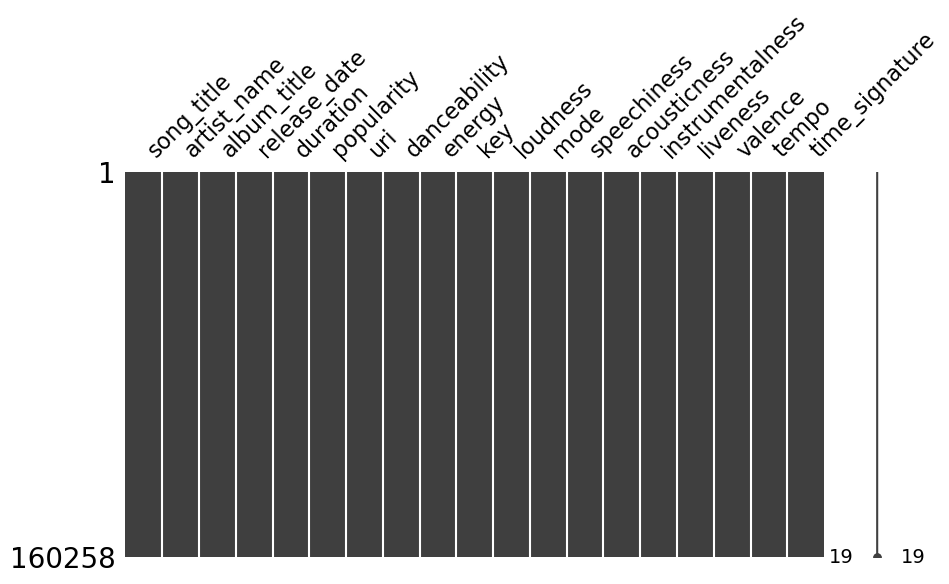

In [14]:
#  dropping rows with empty release dates
spotify_clean_df = spotify_clean_df.dropna(subset=["release_date"])

#  check if there are any null values
msno.matrix(spotify_clean_df, figsize=(10,5))

In [15]:
total_after_dropN = spotify_clean_df.shape
drop_countN = total_before_dropN[0] - total_after_dropN[0]

print(f"Current total entries: {total_after_dropN[0]} from {total_before_dropN[0]}")
print(f"Entries removed: {drop_countN}")

Current total entries: 160258 from 160513
Entries removed: 255


### Drop duplicated entries

In [16]:
#  for reference 
total_before_dropD = spotify_clean_df.copy().shape

print(f"Current total entries before dropping duplicate values: {total_before_dropD[0]}")

Current total entries before dropping duplicate values: 160258


In [17]:
#  dropping duplicate rows 
spotify_clean_df = spotify_clean_df.drop_duplicates(subset=["uri"])
spotify_clean_df

,song_title,artist_name,album_title,release_date,duration,popularity,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Swan Upon Leda,Hozier,Swan Upon Leda,2022-10-07,222026,57,spotify:track:3TjoLn6AliBGi3QbwwTxKp,0.312,0.399,2,-8.506,1,0.0321,0.471000,0.583000,0.130,0.144,126.025,4
1,comedy,Sion,love,2022-07-23,213275,48,spotify:track:1kNVRCfLtotmIKQOb87tUL,0.841,0.367,5,-7.085,1,0.0635,0.869000,0.003400,0.114,0.184,110.046,4
2,The Breeze / My Baby Cries,Bill Callahan,Loving Takes This Course - a Tribute to the So...,2009-06-06,383066,44,spotify:track:32QtDJN4oRfo3Jwy6gpoWN,0.438,0.156,2,-17.311,1,0.0302,0.883000,0.268000,0.105,0.222,85.344,4
3,少し泣く,エルスウェア紀行,少し泣く,2021-10-27,311100,34,spotify:track:3UG4sW8T05V7raSbLA67o8,0.622,0.730,1,-7.714,1,0.0368,0.018500,0.000426,0.105,0.538,117.036,4
4,If I Didn't Care,The Ink Spots,The Anthology,1998-06-16,181973,53,spotify:track:2jPgfwVXOKnUl2QLQsnIAT,0.417,0.123,6,-16.572,0,0.0377,0.993000,0.012500,0.143,0.180,137.444,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160508,Raincoat,Crash Kings,Crash Kings,2009-01-01,237160,19,spotify:track:4cFfiJCmRfPd9H9p2s5AdT,0.616,0.828,11,-4.736,1,0.1330,0.005780,0.000000,0.352,0.576,123.986,4
160509,Such Sweet Thunder,Delfeayo Marsalis,Sweet Thunder: Duke & Shak,2011-01-18,363566,13,spotify:track:4diUG4YVYzfNL7a3cawE7N,0.689,0.701,8,-5.743,1,0.0667,0.025300,0.000000,0.154,0.463,131.988,4
160510,Rainy Days and Mondays,Pat Metheny,What's It All About,2011-06-14,432000,29,spotify:track:1Sv7zdEn0ez8ToEKsPiWWj,0.234,0.865,9,-5.131,1,0.0516,0.000036,0.000532,0.289,0.194,137.107,4
160511,Rain Drops Keep Falling On My Head (Re-Recorde...,B.J. Thomas,Guilty Pleasures (Re-Recorded / Remastered Ver...,2009-10-01,177028,0,spotify:track:1K3jYWWhRk5Gg8lVtEgbhK,0.733,0.899,0,-4.237,1,0.1430,0.004960,0.000047,0.372,0.760,127.086,4


In [18]:
total_after_dropD = spotify_clean_df.shape
drop_countD = total_before_dropD[0] - total_after_dropD[0]

print(f"Current total entries: {total_after_dropD[0]} from {total_before_dropD[0]}")
print(f"Entries removed: {drop_countD}")

Current total entries: 114506 from 160258
Entries removed: 45752


### Data validation

We are going to check if the entries in the dataset are all song tracks. 

To do this, we will try to manually comb over the albums and the artists first.

In [19]:
#  Checking if tracks extracted are actually songs rather than audiobook/podcasts
#  Manually checking aberant "albums" that will be removed from the dataset
spotify_clean_df.album_title.value_counts().sample(15).head(15)

Lotus                                                                         1
La bohème: O soave fanciulla                                                  1
The World We Knew                                                             3
The Man From U.N.C.L.E. (Original Motion Picture Soundtrack)                  1
If I Stay (Original Motion Picture Soundtrack) [Deluxe Version]               1
The Lord of the Rings: The Two Towers (Original Motion Picture Soundtrack)    1
Forgive Me                                                                    2
Black, Brown and Beige                                                        1
Careless Love                                                                 2
Bonnaroo 2004                                                                 1
High Water / Art of Survival                                                  2
I'm Around                                                                    1
another LOOK                            

In [20]:
#  Manually checking aberant "artists" that will be removed from the dataset
spotify_clean_df.artist_name.value_counts().sample(15).head(15)

Lova Carling           1
THEESatisfaction       1
Joseph FireCrow        2
Beny Moré              2
The Killers           47
Terry Clarke           1
Dee C. Lee             1
Donovan Woods          6
Henry Thomas Smart     1
Failure                1
KAIA                   3
Andrew W.K.            3
Young Gunner           2
John De Sohn           5
Jolyon Petch           1
Name: artist_name, dtype: int64

There seems to be a lot of albums that are specific to French tutorials. 

We focus our attention to these albums.

In [21]:
#  searching for albums that has the word french in their titles since this seems to be the most common deviant
spotify_clean_df[spotify_clean_df.album_title.str.contains("French")].album_title.value_counts().head()

Learn In Your Car: Verbs 101 French              86
English To French                                51
Learn in Your Car: French Level 1                45
Learn in Your Car: French Level 2                35
French-English Audio Dictionary For Beginners    31
Name: album_title, dtype: int64

These albums will be removed to make sure that most entries are music/song tracks.

In [22]:
#  for reference 
total_before_filter = spotify_clean_df.copy().shape

print(f"Current total entries before filtering out: {total_before_filter[0]}")

Current total entries before filtering out: 114506


We found other artists and albums that fall under audiobooks and spoken poetry in the dataset. We will remove these promptly. 

In [23]:
deviant_albums = ["Learn In Your Car: Verbs 101 French",
                  "English To French",
                  "Learn in Your Car: French Level 1",
                  "The Velveteen Rabbit",
                  "French-English Audio Dictionary For Beginners",
                  "Learn In Your Car: Verbs 101 French",
                  "English To French",
                  "Learn in Your Car: French Level 1",
                  "Learn in Your Car: French Level 2",
                  "French-English Audio Dictionary For Beginners",
                  "Learn in Your Car: French Level 3",
                  "Learn to Speak French: English-French Phrase and Word Audio Book",
                  "Learn French Words",
                  "VocabuLearn® Word Boosters French",
                  "Speak and Read French, Part 3: French Literature",
                  "Vocabulearn ® French - English Level 3",
                  "Vocabulearn ® French - English Level 2",
                  "Vocabulearn ® French - English Level 1",
                  "Speak and Read French, Vol. 2: Basic and Intermediate",
                  "Speak and Read French, Vol. 1: Basic",
                  "Learn French - Easily, Effectively, and Fluently",
                  "English to French - Useful Phrases",
                  "Learn French Fast",
                  "Learn French Self-Taught - Franz Thimm",
                  "Easy Conversations in French - Gustave Chouquet",
                  "An Interview with Kris Needs",
                  "Civil Rights vs. Social Privilege",
                  "More Ghost Stories by M. R. James",
                  "The Halloween Poetry Collection",
                  ]

deviant_artists = ["Orange",
                   "DBS Audiobooks",
                   "VANTAGE"
                   ]

#  removing the previously listed albums and artists
sans_devalbums = ~spotify_clean_df["album_title"].isin(deviant_albums)
sans_devartists = ~spotify_clean_df["artist_name"].isin(deviant_artists)
spotify_clean_df = spotify_clean_df[sans_devalbums & sans_devartists]
display(spotify_clean_df.sample(5))

,song_title,artist_name,album_title,release_date,duration,popularity,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
330,Campus,Vampire Weekend,Vampire Weekend,2008-01-27,176466,64,spotify:track:5dUFfk2cwD8GiJPS03mYN0,0.639,0.704,7,-5.818,1,0.0659,0.22000,0.0872,0.0849,0.6450,162.983,4
143081,Sonhos de Deus (Oração Cap. 4),Padre Marcelo Rossi,O Tempo de Deus,2014-10-12,227320,36,spotify:track:3jHD31nMDVZCjLHdW4F3xg,0.926,0.627,4,-6.834,1,0.0821,0.79300,0.0000,0.1660,0.8130,136.019,4
29428,Yearning For Your Love,Guy,The Future,1990-11-13,296066,42,spotify:track:59RsOKnsQT3UKLFtCgYUve,0.469,0.594,7,-8.209,1,0.0403,0.06630,0.0000,0.0806,0.4850,167.223,4
150951,Super Bad - Live,James Brown,Get On Up - The James Brown Story (Original Mo...,2014-07-29,304693,0,spotify:track:7zIpjRk20OoPi2Ip46aeeg,0.642,0.873,2,-5.821,1,0.0551,0.00394,0.0000,0.1750,0.6620,82.002,4
56501,Meteorites,Purrple Cat,Sea of Stars,2022-04-04,183154,44,spotify:track:7JtKDBS4maj80mW1HuFssc,0.668,0.399,1,-7.544,1,0.0298,0.17300,0.7270,0.0950,0.0978,148.038,4


In [24]:
total_after_filter = spotify_clean_df.shape
filter_count = total_before_filter[0] - total_after_filter[0]

print(f"Current total entries: {total_after_filter[0]} from {total_before_filter[0]}")
print(f"Entries removed: {filter_count}")

Current total entries: 113947 from 114506
Entries removed: 559


### Scaling specific features
 

We will scale the values for the specifc audio features/qualities. 

In [25]:
to_scale = ["danceability",
            "energy",
            "loudness",
            "speechiness",
            "acousticness",
            "instrumentalness",
            "liveness",
            "valence",
            "tempo",
            "popularity"
            ]

spotify_scaled_df = spotify_clean_df.copy()

scaler = MinMaxScaler()

spotify_scaled_df.loc[:, to_scale] = scaler.fit_transform(spotify_scaled_df.loc[:, to_scale])

spotify_scaled_df[to_scale].describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,113947.0,0.569690,0.182480,0.0,0.454361,0.587221,0.701826,1.0
energy,113947.0,0.582909,0.266915,0.0,0.398000,0.628000,0.803000,1.0
loudness,113947.0,0.808377,0.103879,0.0,0.781792,0.839683,0.874490,1.0
speechiness,113947.0,0.081074,0.097327,0.0,0.036054,0.047211,0.078512,1.0
acousticness,113947.0,0.356834,0.347503,0.0,0.034337,0.226908,0.668675,1.0
instrumentalness,113947.0,0.166999,0.322784,0.0,0.000000,0.000086,0.063100,1.0
liveness,113947.0,0.202075,0.185729,0.0,0.096700,0.122000,0.242000,1.0
valence,113947.0,0.472034,0.261361,0.0,0.257257,0.464464,0.683684,1.0
tempo,113947.0,0.497800,0.123193,0.0,0.403511,0.499507,0.574790,1.0
popularity,113947.0,0.363136,0.222399,0.0,0.220000,0.400000,0.520000,1.0


### Converting duration from ms to min 

We will be converting the values in the duration feature from milliseconds to minutes so that we can easily comprehend the values.

In [26]:
spotify_clean_df = spotify_scaled_df.copy()

In [27]:
spotify_clean_df.loc[:, 'duration'] = spotify_scaled_df.loc[:, 'duration'] / 60000
spotify_clean_df.duration.describe()

count    113947.000000
mean          3.863394
std           3.092581
min           0.024433
25%           2.937500
50%           3.524217
75%           4.221975
max         260.900000
Name: duration, dtype: float64

From here we can easily understand how long songs are since these are units that we often work with.

### Get specific year when track was released (release_year)

In [28]:
spotify_clean_df.loc[:, "release_year"] = spotify_clean_df.loc[:, "release_date"].dt.year

spotify_clean_df

,song_title,artist_name,album_title,release_date,duration,popularity,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
0,Swan Upon Leda,Hozier,Swan Upon Leda,2022-10-07,3.700433,0.57,spotify:track:3TjoLn6AliBGi3QbwwTxKp,0.316430,0.399,2,0.824630,1,0.033161,0.472892,0.583000,0.130,0.144144,0.524695,4,2022
1,comedy,Sion,love,2022-07-23,3.554583,0.48,spotify:track:1kNVRCfLtotmIKQOb87tUL,0.852941,0.367,5,0.847386,1,0.065599,0.872490,0.003400,0.114,0.184184,0.458168,4,2022
2,The Breeze / My Baby Cries,Bill Callahan,Loving Takes This Course - a Tribute to the So...,2009-06-06,6.384433,0.44,spotify:track:32QtDJN4oRfo3Jwy6gpoWN,0.444219,0.156,2,0.683626,1,0.031198,0.886546,0.268000,0.105,0.222222,0.355323,4,2009
3,少し泣く,エルスウェア紀行,少し泣く,2021-10-27,5.185000,0.34,spotify:track:3UG4sW8T05V7raSbLA67o8,0.630832,0.730,1,0.837313,1,0.038017,0.018574,0.000426,0.105,0.538539,0.487270,4,2021
4,If I Didn't Care,The Ink Spots,The Anthology,1998-06-16,3.032883,0.53,spotify:track:2jPgfwVXOKnUl2QLQsnIAT,0.422921,0.123,6,0.695460,0,0.038946,0.996988,0.012500,0.143,0.180180,0.572237,3,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160508,Raincoat,Crash Kings,Crash Kings,2009-01-01,3.952667,0.19,spotify:track:4cFfiJCmRfPd9H9p2s5AdT,0.624746,0.828,11,0.885003,1,0.137397,0.005803,0.000000,0.352,0.576577,0.516206,4,2009
160509,Such Sweet Thunder,Delfeayo Marsalis,Sweet Thunder: Duke & Shak,2011-01-18,6.059433,0.13,spotify:track:4diUG4YVYzfNL7a3cawE7N,0.698783,0.701,8,0.868877,1,0.068905,0.025402,0.000000,0.154,0.463463,0.549522,4,2011
160510,Rainy Days and Mondays,Pat Metheny,What's It All About,2011-06-14,7.200000,0.29,spotify:track:1Sv7zdEn0ez8ToEKsPiWWj,0.237323,0.865,9,0.878677,1,0.053306,0.000036,0.000532,0.289,0.194194,0.570834,4,2011
160511,Rain Drops Keep Falling On My Head (Re-Recorde...,B.J. Thomas,Guilty Pleasures (Re-Recorded / Remastered Ver...,2009-10-01,2.950467,0.00,spotify:track:1K3jYWWhRk5Gg8lVtEgbhK,0.743408,0.899,0,0.892994,1,0.147727,0.004980,0.000047,0.372,0.760761,0.529113,4,2009


### Checking for normality

Statistical tests used to analyze data require assumptions for the results to be valid.  

In [29]:
kstest(spotify_clean_df["popularity"], 'norm')

KstestResult(statistic=0.5, pvalue=0.0)

not normally distributted

## Exploratory Data Analysis 

In [30]:
# Summary Statistics
spotify_clean_df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,113947.0,3.863394,3.092581,0.024433,2.937500,3.524217,4.221975,260.9
popularity,113947.0,0.363136,0.222399,0.000000,0.220000,0.400000,0.520000,1.0
danceability,113947.0,0.569690,0.182480,0.000000,0.454361,0.587221,0.701826,1.0
energy,113947.0,0.582909,0.266915,0.000000,0.398000,0.628000,0.803000,1.0
key,113947.0,5.217926,3.567738,0.000000,2.000000,5.000000,8.000000,11.0
loudness,113947.0,0.808377,0.103879,0.000000,0.781792,0.839683,0.874490,1.0
mode,113947.0,0.664581,0.472139,0.000000,0.000000,1.000000,1.000000,1.0
speechiness,113947.0,0.081074,0.097327,0.000000,0.036054,0.047211,0.078512,1.0
acousticness,113947.0,0.356834,0.347503,0.000000,0.034337,0.226908,0.668675,1.0
instrumentalness,113947.0,0.166999,0.322784,0.000000,0.000000,0.000086,0.063100,1.0


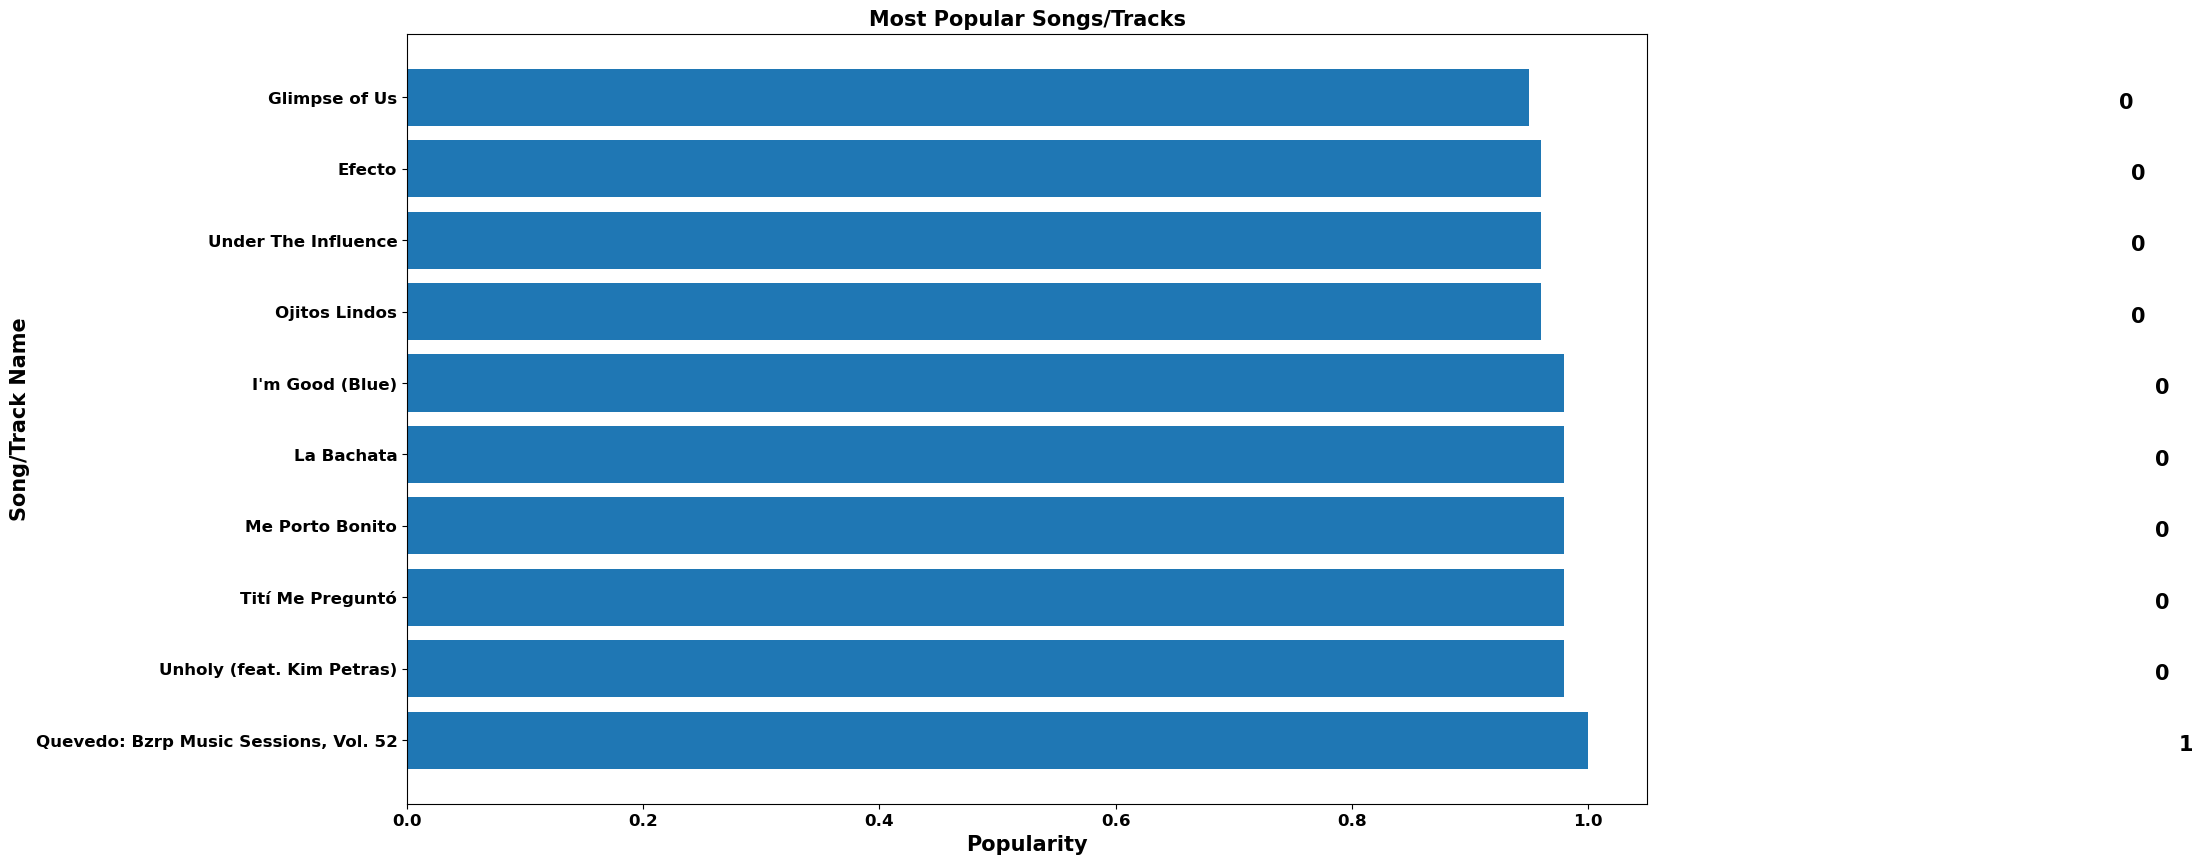

In [31]:
#get top 10 most popular tracks 
popular_songs=spotify_clean_df.groupby('song_title')['popularity'].mean().sort_values(ascending=False).head(10)

# Plot horizontal bar chart
plt.figure(figsize=(16, 10))
plt.barh(popular_songs.index, popular_songs)
plt.title('Most Popular Songs/Tracks', fontdict=dict(fontsize=15), fontweight='bold')
plt.xlabel('Popularity', fontdict=dict(fontsize=15), fontweight='bold')
plt.ylabel('Song/Track Name', fontdict=dict(fontsize=15), fontweight='bold')
plt.xticks(fontsize='large', weight='bold')
plt.yticks(fontsize='large', weight='bold')
for i, v in enumerate(popular_songs):
    plt.text(v+0.5, i-0.15, str(int(v)), fontdict=dict(fontsize=15), fontweight='bold')
plt.show()

In [32]:
# Get artist count of the dataset
len(spotify_clean_df.groupby(['artist_name']).count())

35166

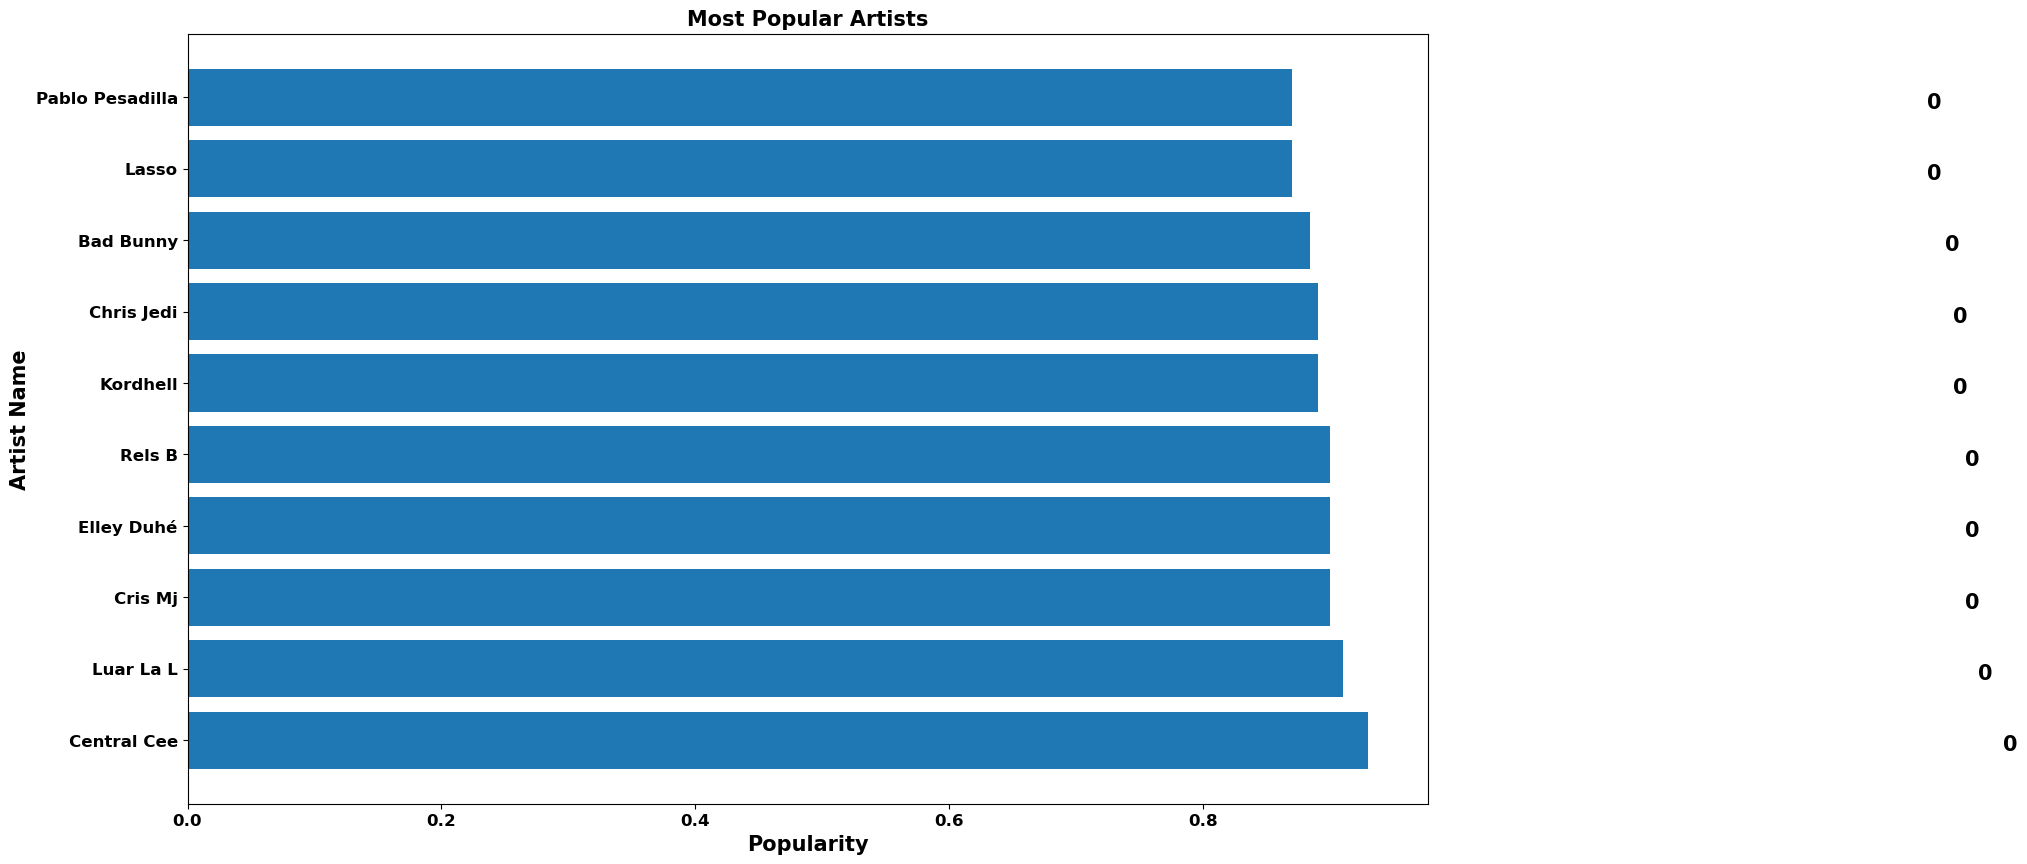

In [33]:
# Get top 10 most popular artists
popular_artists=spotify_clean_df.groupby('artist_name')['popularity'].mean().sort_values(ascending=False).head(10)

# Plot horizontal bar chart
plt.figure(figsize=(16, 10))
plt.barh(popular_artists.index, popular_artists)
plt.title('Most Popular Artists', fontdict=dict(fontsize=15), fontweight='bold')
plt.xlabel('Popularity', fontdict=dict(fontsize=15), fontweight='bold')
plt.ylabel('Artist Name', fontdict=dict(fontsize=15), fontweight='bold')
plt.xticks(fontsize='large', weight='bold')
plt.yticks(fontsize='large', weight='bold')
for i, v in enumerate(popular_artists):
    plt.text(v+0.5, i-0.15, str(int(v)), fontdict=dict(fontsize=15), fontweight='bold')
plt.show()


In [38]:
# Aggregate numeric values by year
spotify_year_df = spotify_clean_df.groupby(['release_year']).agg({'song_title': 'count', 
                                                          'duration': ['mean', 'min', 'max', 'std'],
                                                         'danceability': ['mean', 'min', 'max', 'std'],
                                                         'energy': ['mean', 'min', 'max', 'std'],
                                                         'loudness': ['mean', 'min', 'max', 'std'],
                                                         'speechiness': ['mean', 'min', 'max', 'std'],
                                                         'acousticness': ['mean', 'min', 'max', 'std'],
                                                         'instrumentalness': ['mean', 'min', 'max', 'std'],
                                                         'liveness': ['mean', 'min', 'max', 'std'],
                                                         'valence': ['mean', 'min', 'max', 'std'],
                                                         'tempo': ['mean', 'min', 'max', 'std'],
                                                         'key': ['mean', 'min', 'max', 'std'],
                                                         'mode': ['mean', 'min', 'max', 'std'],
                                                         'time_signature': ['mean', 'min', 'max', 'std'],})
spotify_year_df['duration'].tail(10)

,mean,min,max,std
release_year,,,,
2013,4.412410,0.243367,73.423550,4.722735
2014,4.749149,0.298283,100.011017,7.071632
2015,3.852927,0.153650,181.833450,3.241382
2016,4.249467,0.091317,260.900000,8.102442
2017,3.704109,0.168783,20.839333,1.284704
2018,3.631076,0.489767,23.096667,1.150308
2019,3.586044,0.290000,29.783833,1.407152
2020,3.553884,0.606983,21.608600,1.225583
2021,3.354478,0.618067,22.400000,1.163979


In [39]:
# Some tracks are more than an hour long
outlier = spotify_clean_df[(spotify_clean_df['duration'] >= 260) & (spotify_clean_df['release_year'] == 2016)]
outlier

,song_title,artist_name,album_title,release_date,duration,popularity,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
10843,The Rise and Fall of Bossanova Section IV,P C III,The Rise and Fall of Bossanova (A 13:23:32 Song),2016-11-01,260.9,0.25,spotify:track:0q5lnUuDhlogtYCOubNQhQ,0.216024,0.0477,1,0.582593,1,0.053926,0.932731,0.85,0.176,0.01992,0.355998,4,2016


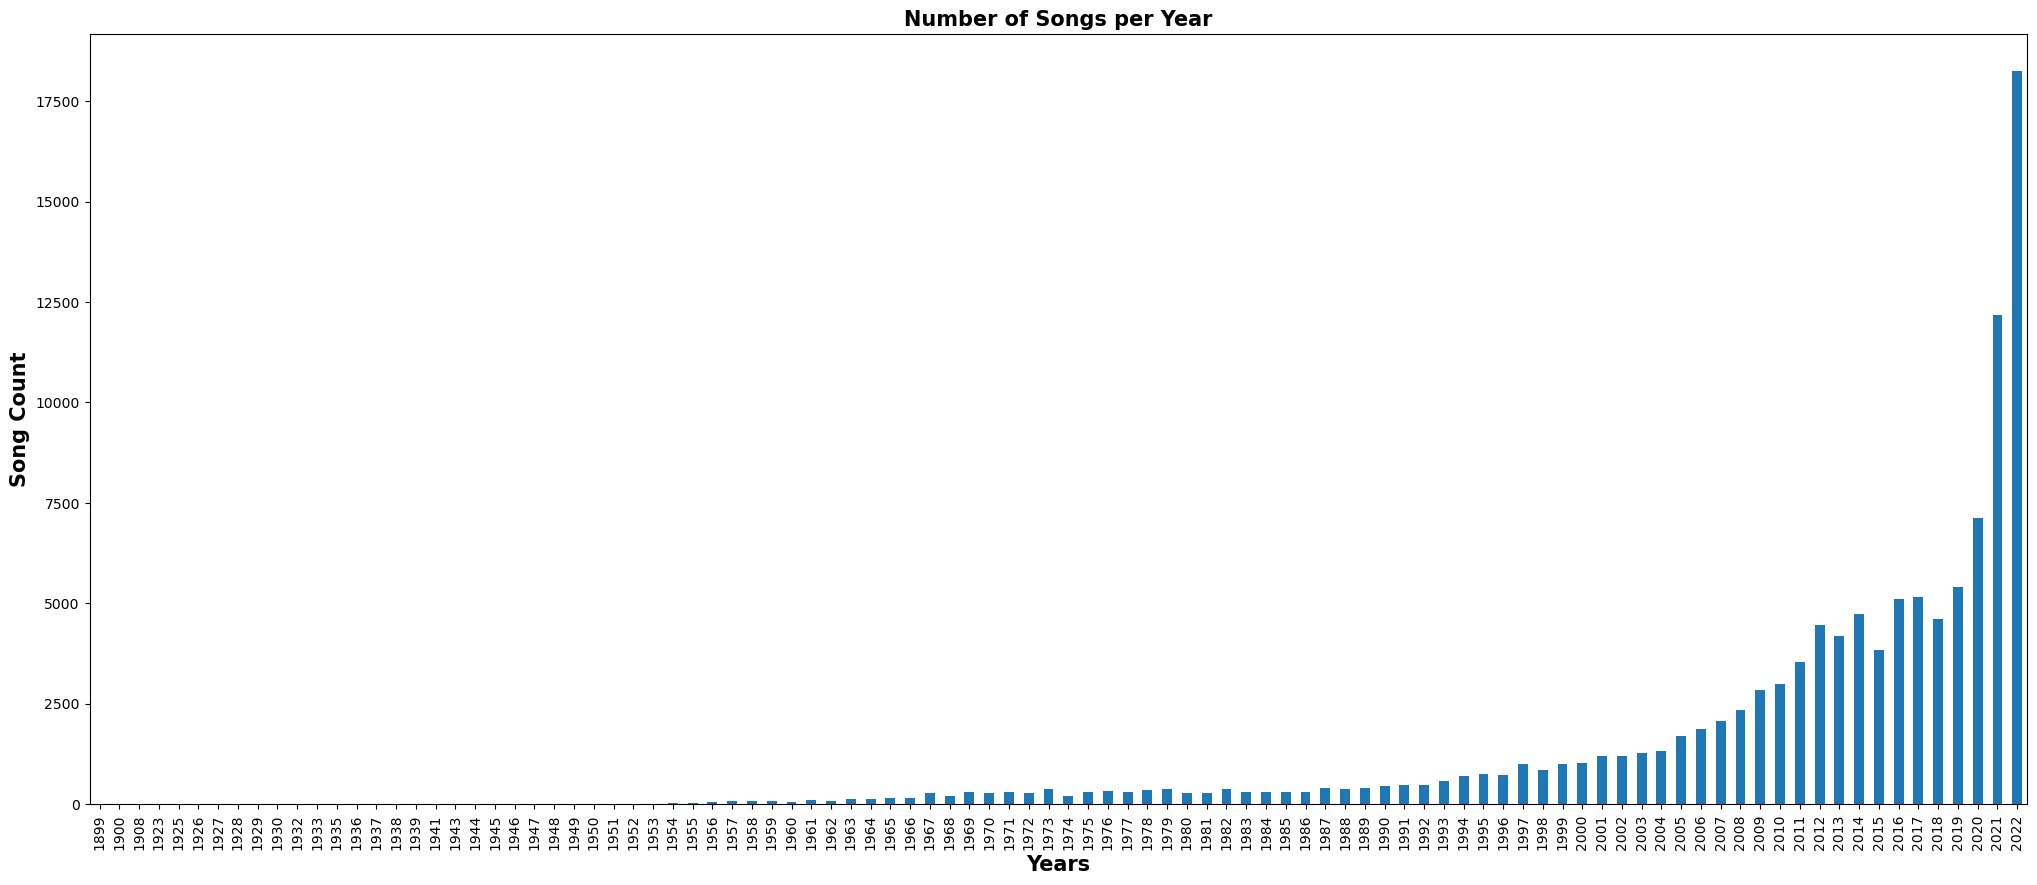

In [42]:
# Number of songs per year
spotify_year_df['song_title']['count'].plot(kind='bar', figsize=(25,10))
plt.title('Number of Songs per Year', fontdict=dict(fontsize=15), fontweight='bold')
plt.xlabel('Years', fontdict=dict(fontsize=15), fontweight='bold')
plt.ylabel('Song Count', fontdict=dict(fontsize=15), fontweight='bold')
plt.show()

#### Correlation

| Absolute Value of Coefficient Correlation | Strength of Linear Relationship |
|-------------------------------------------|---------------------------------|
|0-0.2|Very Weak|
|0.2-0.4|Weak|
|0.4-0.6|Moderate|
|0.6-0.8|Strong|
|0.8-1.0|Very Strong|

In [ ]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(spotify_clean_df.corr(), dtype=np.bool))
heatmap=sns.heatmap(spotify_clean_df.corr(),mask=mask, vmin=-1,vmax=1,annot=True, cmap='BrBG', linewidths=1.5)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

#### Strong to Very Strong Correlation

- loudness & energy
- acousticcness & energy
- acousticness & loudness
- instrumentalness & loudness

In [ ]:
# get a sample dataframe
sample_df = spotify_clean_df.sample(int(0.004*len(spotify_clean_df)))   

print(len(sample_df))

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.regplot(data=sample_df, y="loudness", x="energy", color="c").set(title="Loudness vs Energy Correlation")

plt.subplot(2,2,2)
sns.regplot(data=sample_df, y="acousticness", x="energy", color="c").set(title="Acousticness vs Energy Correlation")

plt.subplot(2,2,3)
sns.regplot(data=sample_df, y="acousticness", x="loudness", color="c").set(title="Acousticness vs Loudness Correlation")

plt.subplot(2,2,4)
sns.regplot(data=sample_df, y="instrumentalness", x="loudness", color="c").set(title="Instrumentalness vs Loudness Correlation")

In [ ]:
# spotify_clean_df['dates']=spotify_clean_df.index.get_level_values('release_date')
# spotify_clean_df.dates=pd.to_datetime(spotify_clean_df.dates)
# years=spotify_clean_df.dates.dt.years

In [ ]:
# Average duration of tracks per year
spotify_year_df['duration']['mean'].plot(figsize=(20,10))
plt.show()

In [ ]:
# Distribution of songs based on duration
prev_years = [1980, 1990, 2000, 2010]
end_years = [1989, 1999, 2009, 2022]
lower_duration = 0
upper_duration = 10
duration_limit = (spotify_clean_df['duration'] >= lower_duration) & (spotify_clean_df['duration'] <= upper_duration) 

fig = plt.figure(figsize=(20,20))

for i in range(len(prev_years)):
    
    ax = fig.add_subplot(2, 2, i+1)
    spotify_yrRange_df = spotify_clean_df.loc[duration_limit & (spotify_clean_df['year'] >= prev_years[i]) & (spotify_clean_df['year'] <= end_years[i])]
    ax.hist(spotify_yrRange_df['duration'], bins = 30)
    
plt.show()

In [ ]:
# Distribution of songs based on popularity
prev_years = [1980, 1990, 2000, 2010]
end_years = [1989, 1999, 2009, 2022]
lower_popularity = 1
upper_popularity = 100
popularity_limit = (spotify_clean_df['popularity'] >= lower_popularity) & (spotify_clean_df['popularity'] <= upper_popularity) 

fig = plt.figure(figsize=(20,20))

for i in range(len(prev_years)):
    
    ax = fig.add_subplot(2, 2, i+1)
    spotify_yrRange_df = spotify_clean_df.loc[popularity_limit & (spotify_clean_df['year'] >= prev_years[i]) & (spotify_clean_df['year'] <= end_years[i])]
    ax.hist(spotify_yrRange_df['popularity'], bins = 30)
    
plt.show()

In [ ]:
# Create a top 100 songs dataframe (based on popularity)
spotify_top100_df = spotify_clean_df.sort_values(by=['popularity'], ascending=False).head(100)
spotify_clean_df.sort_values(by=['popularity'], ascending=False).iloc[100] # After top 100 > Song number 101

In [ ]:
# Create separate dataframe for remaining songs in the dataset
a = spotify_clean_df.sort_values(by=['popularity'], ascending=False)
b = spotify_top100_df

In [ ]:
spotify_out100_df = pd.merge(a,b, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
spotify_out100_df.head()

In [ ]:
# Compare each audio feature of the top 100 songs with the rest of the dataset (box plots)
plt.figure(figsize=(20,10))
sns.boxplot(data=spotify_top100_df.drop(['song_title','artist_name','release_date','uri','year'],axis=1))
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()

In [ ]:
#Pairplot
sns.pairplot(data=spotify_top100_df.drop(['song_title','artist_name','release_date','uri','year'],axis=1))
plt.show()

In [ ]:
# distribution of popularity of the top 100 songs
sns.distplot(spotify_top100_df['popularity'])

not normal \
consolidated distributions and attributes are shown in the pairplot showing that there is no normally distributed variable

### From what year did we collect the most songs?

### How long are most songs?

### What are the average qualities of the entire dataset?

### Who are the most popular artists?

In [ ]:
popular_songs = spotify_clean_df[spotify_clean_df.popularity.ge(.7)].sort_values(by="popularity", ascending=False)

popular_songs

In [ ]:
top_artists = popular_songs.groupby(by="artist_name")["popularity"].count().sort_values(ascending=False).head(15)

top_artists

### What are the avergage qualities of the songs from most of the popular artists?

In [ ]:
relevant_qualities = ["danceability",
                      "energy",
                      "loudness",
                      "acousticness",
                      "instrumentalness",
                      "liveness",
                      "valence",
                      "tempo"]

In [ ]:
popartist_song_qualities = popular_songs.loc[popular_songs.artist_name.isin(top_artists.index)]
popartist_song_qualities = popartist_song_qualities.groupby(by="artist_name")[relevant_qualities].mean()
popartist_song_qualities

In [ ]:
#  kindly visualize this with a line_polar using plotly express

### What are the average qualities of most of the popular songs

In [ ]:
popsong_qualities = popular_songs.loc[:, relevant_qualities].mean()
popsong_qualities

In [ ]:
#  kindly visualize this with a line_polar using plotly express

### What are the average qualities of the songs in each year?

In [ ]:
annual_song_qualities = spotify_clean_df.groupby(by="release_year")[relevant_qualities].mean()
annual_song_qualities = annual_song_qualities.sort_index(ascending=False)
annual_song_qualities

In [ ]:
popular_songs.release_year.value_counts()

In [ ]:
spotify_clean_df.release_year.value_counts()

### Do songs these days tend to be more danceable or have higher energy?

### Which factors are correlated with each other?
For the following, show yung scatterplot to make a point 
<br>
Energy and danceability (they’re remarkably similar in that they produce similar patterns)
- With duration 
- With loudness
- With valence 
- With tempo
<br>

Acousticness
- With energy
- With loudness
- With danceability
